# Efficient frontier
We will be simulating efficient frontier in this notebook:
1. acquire price data of the 'FAANG' stocks using pandas_datareader
2. calculate daily returns
3. calculate covariance matrix
4. calculate annualized portfolio returns and risks given a set of weights
5. simulating different portfolio returns and risks and store the results
6. plot the effient frontier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web

### acquire price data

In [2]:
ticks = ['FB','AMZN', 'AAPL', 'NFLX', 'GOOGL']
price_data_download = web.get_data_yahoo(ticks,
                           start = '2012-12-31',
                           end = '2017-12-31')['Adj Close']

### calculate daily returns and covariance matrix

In [3]:
price_data = price_data_download.copy()
log_return_data =np.log(  price_data/price_data.shift(1) )
n_days = 252
mean_log_return = log_return_data.mean().to_numpy()
cov_return = log_return_data.cov() * n_days

### define a function to calculate annualized portfolio returns and risks given a vector of weights

In [4]:
def portfolio_returns_risks(weights, mean_log_return, cov_return, n_days ):
    temp_mean = (1+ mean_log_return.dot(weights) )**n_days -1
    temp_std =np.sqrt(  weights.dot(cov_return).dot(weights.T) )
    return [temp_mean, temp_std]

### simulation

In [7]:
n_nimulations = 5000
simulation_results = []
for i in range(n_nimulations):
    weights = np.random.uniform( size = len(ticks) )
    weights = weights/np.sum(weights) 
    results = portfolio_returns_risks(weights, mean_log_return, cov_return, n_days )
    simulation_results.append( results  )
simulation_results_df = pd.DataFrame(simulation_results, columns = ['returns', 'risks'])
simulation_results_df.head()

,returns,risks
0,0.402904,0.231085
1,0.456232,0.262201
2,0.371824,0.216020
3,0.437778,0.246779
4,0.362343,0.205171


### plot the efficient frontier

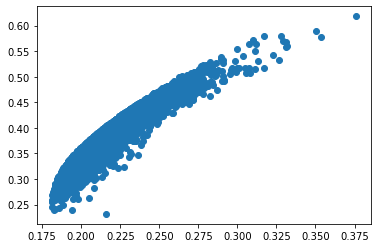

In [6]:
%matplotlib inline
fig = plt.figure()
plt.scatter(simulation_results_df['risks'], simulation_results_df['returns'])
plt.show()